# Author : Nithesh Kumar Manimaran
# Date   : 13-12-2022
# Title  : Project 1 - Identify your favourite Pet

# Objective :
Check if a picture contains my favorite pet or not

# Mission Statement :
* Create our own image dataset
* Define Classification Strategy
* Compare a custom sklearn model with a pre-trained Tf - hub model


# References
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.kaggle.com/code/paperboiii/one-class-classification-for-images
* https://github.com/udacity/dog-project/blob/master/dog_app.ipynb

# Introduction

For this project to identify my favourite pet, I have selected 'Dog' as my favourite pet. 

* For the dataset I will try to download it from fiftyone.zoo. So, basically the idea is create two classes. Class 1 - Dog having images of Dog and Class 2 - Not Dog having images of other animals like cat,bird,hamster and fish. So, the idea is to train a model to classify the images as Dog or Not Dog.

* For the baseline model, I will use Sequential model from Keras. I will use the following layers in the model
    * Conv2D
    * MaxPooling2D
    * Flatten
    * Dense

The strategy for the model is to use the following steps
* Load the dataset
* Preprocess the dataset
* Create the model
* Train the model
* Evaluate the model
* Compare the model with the pre-trained model




# Creating our own image dataset

DOG

In [25]:
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset(
    "open-images-v6", 
    "validation", 
    label_types=["detections"], 
    classes = ["Dog"],
    max_samples=5000,
    seed=51,
    shuffle=True,
    dataset_name="dog_13/12"
)

Only found 1586 (<5000) samples matching your requirements
Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'dog_13/12'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [26]:
import fiftyone as fo
dataset.export(
    export_dir="D:/EPITA/Computer Vision/Project_1/data/train/dog",
    dataset_type=fo.types.COCODetectionDataset,
    label_field="detections",
    
)

Directory 'D:/EPITA/Computer Vision/Project_1/data/train/dog' already exists; export will be merged with existing files
 100% |███████████████| 1586/1586 [15.8s elapsed, 0s remaining, 105.2 samples/s]      


In [27]:
# No of images in the train - dog directory
import os
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/train/dog/data")))

# What is 20% of 1586
print(1586*0.2)

1586
317.20000000000005


In [28]:
# Moving 317 images to the test - dog directory
import shutil
import os
import random
source = "D:/EPITA/Computer Vision/Project_1/data/train/dog/data"
destination = "D:/EPITA/Computer Vision/Project_1/data/test/dog/"

for i in range(317):
    image = random.choice(os.listdir(source))
    shutil.move(os.path.join(source, image), destination)

In [29]:
# No of images in the test - dog directory
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/test/dog")))
# No of images in the train - dog directory
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/train/dog/data")))

317
1269


NOT DOG

In [30]:
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset(
    "open-images-v6", 
    "validation", 
    label_types=["detections"], 
    classes = ["Cat", "Bird", "Hamster","Fish"],
    max_samples=5000,
    seed=51,
    shuffle=True,
    dataset_name="cat_bird_hamster_fish_13/12"
)

Only found 1323 (<5000) samples matching your requirements
Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'cat_bird_hamster_fish_13/12'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [31]:
import fiftyone as fo
dataset.export(
    export_dir="D:/EPITA/Computer Vision/Project_1/data/train/not_dog",
    dataset_type=fo.types.COCODetectionDataset,
    label_field="detections",
)

Directory 'D:/EPITA/Computer Vision/Project_1/data/train/not_dog' already exists; export will be merged with existing files
 100% |███████████████| 1323/1323 [12.6s elapsed, 0s remaining, 94.6 samples/s]       


In [32]:
# No of images in the train - dog directory
import os
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/train/not_dog/data")))

# What is 20% of 1323
print(1323*0.2)

1323
264.6


In [33]:
# Moving 264 images to the test - dog directory
import shutil
import os
import random
source = "D:/EPITA/Computer Vision/Project_1/data/train/not_dog/data"
destination = "D:/EPITA/Computer Vision/Project_1/data/test/not_dog"

for i in range(264):
    image = random.choice(os.listdir(source))
    shutil.move(os.path.join(source, image), destination)

In [34]:
# No of images in the test - dog directory
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/test/not_dog/")))
# No of images in the train - dog directory
print(len(os.listdir("D:/EPITA/Computer Vision/Project_1/data/train/not_dog/data")))

264
1059


# Preprocessing

In [35]:
os.remove('D:/EPITA/Computer Vision/Project_1/data/train/dog/labels.json')
os.remove('D:/EPITA/Computer Vision/Project_1/data/train/not_dog/labels.json')

In [36]:
import os
import shutil

source = 'D:/EPITA/Computer Vision/Project_1/data/train/dog/data'
destination = 'D:/EPITA/Computer Vision/Project_1/data/train/dog/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
	src_path = os.path.join(source, f)
	dst_path = os.path.join(destination, f)
	shutil.move(src_path, dst_path)


In [37]:
import os
import shutil

source = 'D:/EPITA/Computer Vision/Project_1/data/train/not_dog/data'
destination = 'D:/EPITA/Computer Vision/Project_1/data/train/not_dog'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
	src_path = os.path.join(source, f)
	dst_path = os.path.join(destination, f)
	shutil.move(src_path, dst_path)

Removing Empty Directories

In [38]:
os.rmdir('D:/EPITA/Computer Vision/Project_1/data/train/dog/data')
os.rmdir('D:/EPITA/Computer Vision/Project_1/data/train/not_dog/data')

Data-generators

In [39]:
from keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [40]:
train_iterator = train_datagenerator.flow_from_directory('D:/EPITA/Computer Vision/Project_1/data/train/', class_mode='binary', batch_size=64, target_size=(200, 200))
test_iterator = test_datagenerator.flow_from_directory('D:/EPITA/Computer Vision/Project_1/data/test/', class_mode='binary', batch_size=64, target_size=(200, 200))

Found 2328 images belonging to 2 classes.
Found 581 images belonging to 2 classes.


# MODELIZATION

Baseline Model

In [41]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [42]:
# CNN model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [43]:
import warnings
warnings.filterwarnings("ignore")
model = define_model()

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [45]:
history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), epochs=10, validation_data=test_iterator, validation_steps=len(test_iterator), verbose=1)

Epoch 1/10
37/37 [==============================] - 225s 6s/step - loss: 0.7140 - accuracy: 0.5301 - val_loss: 0.6727 - val_accuracy: 0.5886
Epoch 2/10
37/37 [==============================] - 176s 5s/step - loss: 0.6556 - accuracy: 0.6130 - val_loss: 0.6895 - val_accuracy: 0.5146
Epoch 3/10
37/37 [==============================] - 168s 5s/step - loss: 0.6437 - accuracy: 0.6186 - val_loss: 0.6263 - val_accuracy: 0.6437
Epoch 4/10
37/37 [==============================] - 162s 4s/step - loss: 0.6367 - accuracy: 0.6375 - val_loss: 0.6191 - val_accuracy: 0.6764
Epoch 5/10
37/37 [==============================] - 169s 5s/step - loss: 0.6286 - accuracy: 0.6469 - val_loss: 0.6144 - val_accuracy: 0.6799
Epoch 6/10
37/37 [==============================] - 155s 4s/step - loss: 0.6273 - accuracy: 0.6503 - val_loss: 0.6282 - val_accuracy: 0.6282
Epoch 7/10
37/37 [==============================] - 154s 4s/step - loss: 0.6173 - accuracy: 0.6615 - val_loss: 0.6059 - val_accuracy: 0.6420
Epoch 8/10
37

In [46]:
model.save('D:/EPITA/Computer Vision/Project_1/models/version_1_model.h5')

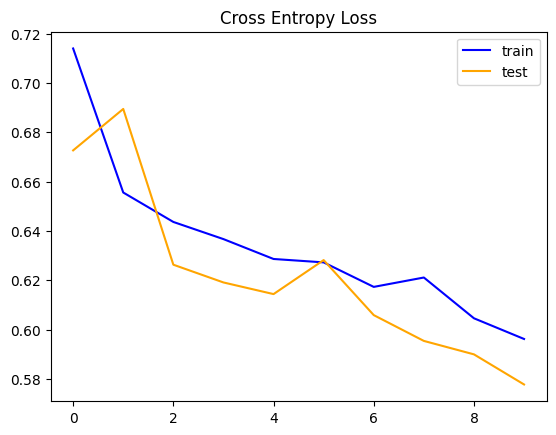

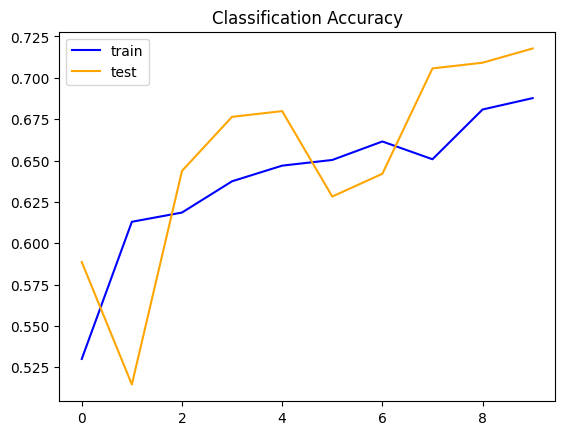

In [47]:
# Plotting the learning curves using model.history from model version_1_model.h5
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
pyplot.show()

pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
pyplot.show()

From the above results, we can see that we got an accuracy of 0.68 and val_accuracy of 0.71 which is not pretty good. So, we will try to improve the model by using the following techniques

# Performances Comparison

# Improving performances with Transfer Learning

In [10]:
# VGG-19 model
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

model = VGG19(include_top=False, input_shape=(200, 200, 3))
for layer in model.layers:
    layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
optimizer = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [12]:
datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_iterator = datagen.flow_from_directory('D:/EPITA/Computer Vision/Project_1/data/train/', class_mode='binary', batch_size=64, target_size=(200, 200))
test_iterator = datagen.flow_from_directory('D:/EPITA/Computer Vision/Project_1/data/test/', class_mode='binary', batch_size=64, target_size=(200, 200))

Found 2328 images belonging to 2 classes.
Found 581 images belonging to 2 classes.


In [50]:
history_1 = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10, verbose=1)

Found 1920 images belonging to 2 classes.
Found 581 images belonging to 2 classes.
Epoch 1/10
30/30 [==============================] - 347s 12s/step - loss: 0.6276 - accuracy: 0.6328 - val_loss: 0.5620 - val_accuracy: 0.6936
Epoch 2/10
30/30 [==============================] - 333s 11s/step - loss: 0.4896 - accuracy: 0.7625 - val_loss: 0.4909 - val_accuracy: 0.7642
Epoch 3/10
30/30 [==============================] - 367s 12s/step - loss: 0.4366 - accuracy: 0.7870 - val_loss: 0.4551 - val_accuracy: 0.7866
Epoch 4/10
30/30 [==============================] - 407s 14s/step - loss: 0.3870 - accuracy: 0.8307 - val_loss: 0.4173 - val_accuracy: 0.8279
Epoch 5/10
30/30 [==============================] - 398s 13s/step - loss: 0.3580 - accuracy: 0.8505 - val_loss: 0.4537 - val_accuracy: 0.7866
Epoch 6/10
30/30 [==============================] - 386s 13s/step - loss: 0.3361 - accuracy: 0.8651 - val_loss: 0.4230 - val_accuracy: 0.8210
Epoch 7/10
30/30 [==============================] - 380s 13s/step

In [51]:
# Saving the model
model.save('D:/EPITA/Computer Vision/Project_1/models/version_2_model.h5')

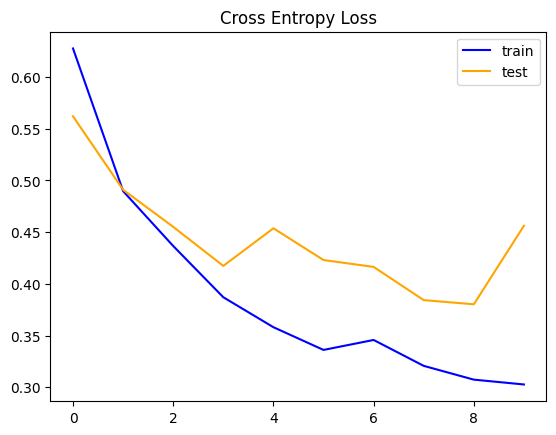

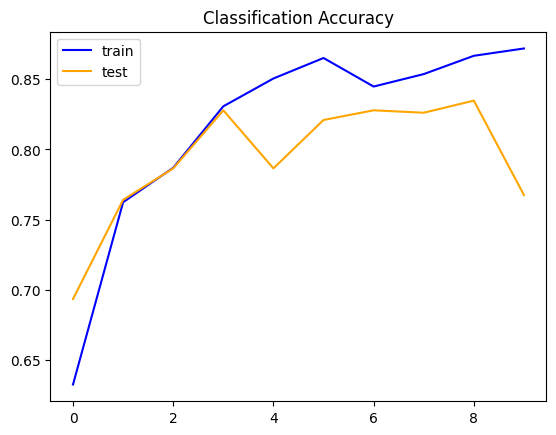

In [63]:
# Plotting the learning curves

pyplot.title('Cross Entropy Loss')
pyplot.plot(history_1.history['loss'], color='blue', label='train')
pyplot.plot(history_1.history['val_loss'], color='orange', label='test')
pyplot.legend()
pyplot.show()

pyplot.title('Classification Accuracy')
pyplot.plot(history_1.history['accuracy'], color='blue', label='train')
pyplot.plot(history_1.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
pyplot.show()

From the above results we can use using transfer learning we can get a better accuracy of 0.87 and val_accuracy of 0.76. So, we can conclude that transfer learning is a better approach to have a better accuracy.

# Pretrained Model - TF Hub - ResNet50

In [13]:
# Import resnet50 weights
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tqdm import tqdm
import numpy as np

In [14]:
# Importing the ResNet50 model
model = ResNet50(weights = 'imagenet')

In [15]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(model.predict(img))

def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [19]:
# Test the dog_detector function
if (dog_detector("D:/EPITA/Computer Vision/Project_1/data/test/dog/0ac8510707245b9f.jpg")) == True:
    print("Dog is present in the image")
else:
    print("Dog is not present in the image")

1/1 [==============================] - 0s 306ms/step
Dog is present in the image


In [18]:
# Test the dog_detector function
if (dog_detector("D:/EPITA/Computer Vision/Project_1/data/test/not_dog/0a389d85258b5e0a.jpg")) == True:
    print("Dog is present in the image")
else:
    print("Dog is not present in the image")

1/1 [==============================] - 0s 292ms/step
Dog is not present in the image


# Conclusion

We have used three modelling techniques to classify the images as Dog or Not Dog. We have used the following techniques
* Baseline Model
* Transfer Learning
* Pretrained Model - TF Hub - ResNet50

From the above results we can see that the best accuracy is obtained from the pretrained model. So, we can conclude that the pretrained model is the best model to classify the images as Dog or Not Dog.

But this is due to the fact that the dataset is small. So, if we have a large dataset then we can imporve the accuracy of the baseline model and transfer learning model.